In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('breast_cancer_prediction.csv')
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataset = dataset.iloc[:,1:]
dataset['Class'].replace({2: 0, 4: 1}, inplace=True)
dataset

C:\Users\alena\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


In [4]:
dataset.duplicated().sum()

234

In [5]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [6]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,0.525612
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.499901
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


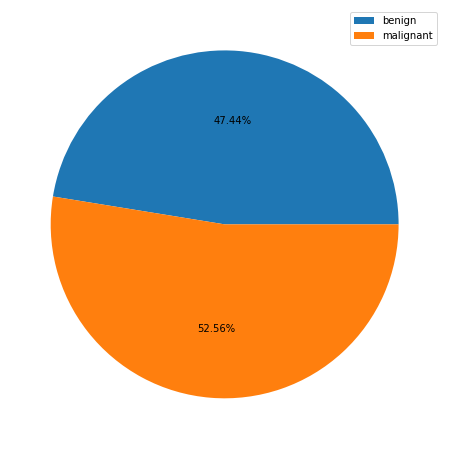

In [8]:
import matplotlib.pyplot as plt
class_count = dataset['Class'].value_counts()
data = np.array([class_count[0],class_count[1]])
labels = ['benign', 'malignant']
fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.pie(data,autopct='%.2f%%')
plt.legend(labels=labels)
plt.show()   

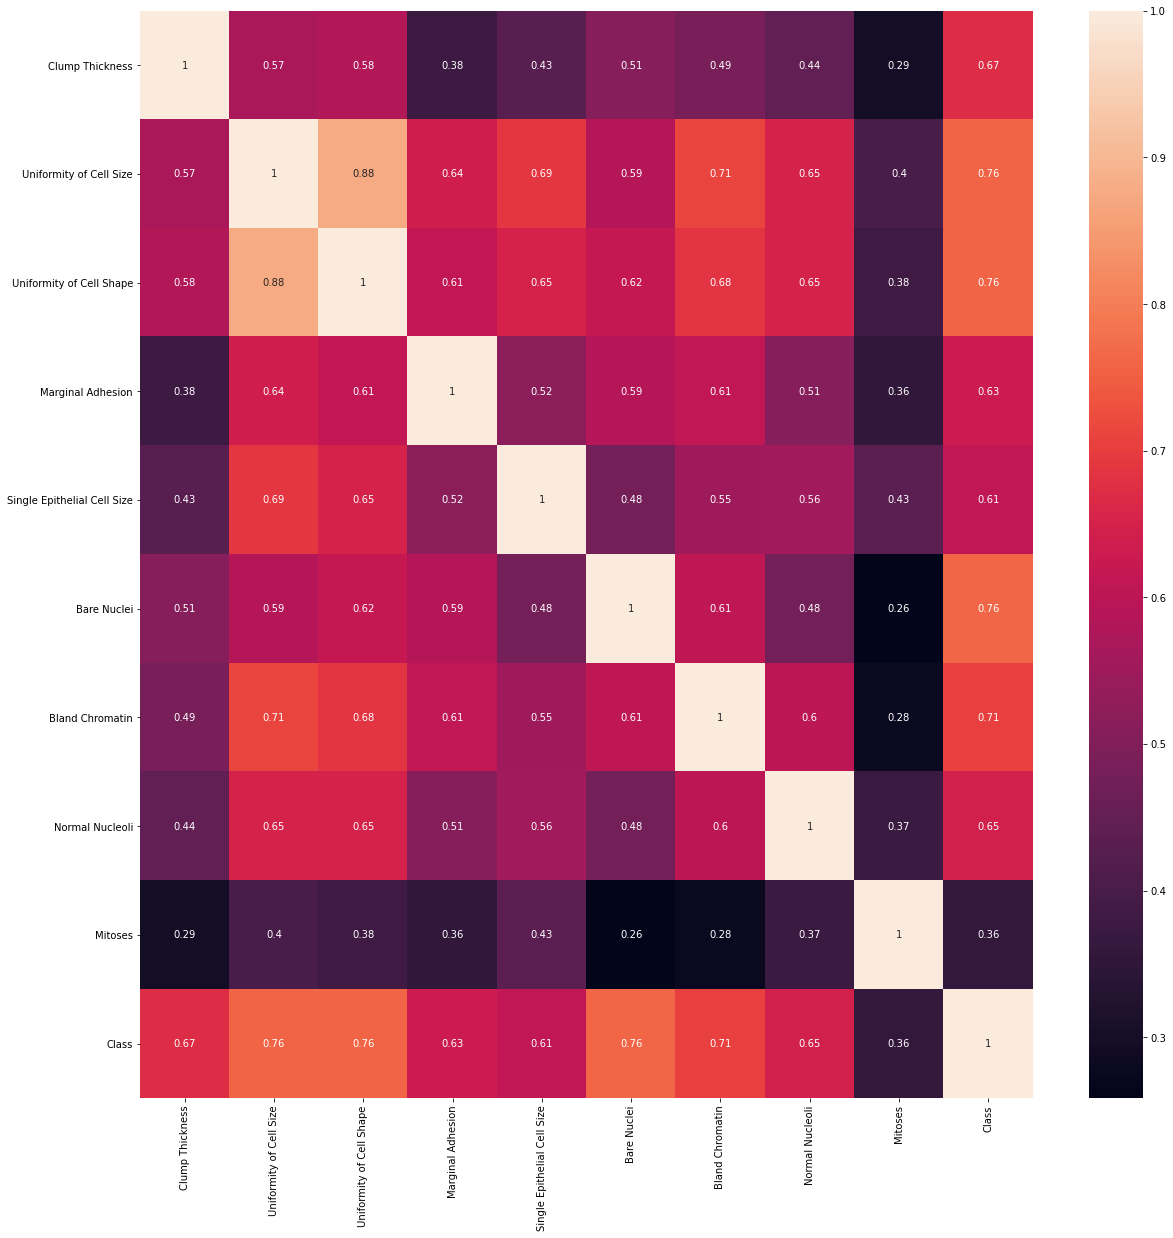

In [9]:
import seaborn as sb
corrMatrix = dataset.corr()
plt.subplots(figsize=(20,20))
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
y = dataset.iloc[:,9].values
X = dataset.iloc[:,0:8].values

In [12]:
X

array([[ 5,  1,  1, ...,  1,  3,  1],
       [ 5,  4,  4, ..., 10,  3,  2],
       [ 3,  1,  1, ...,  2,  3,  1],
       ...,
       [ 5, 10, 10, ...,  3,  8, 10],
       [ 4,  8,  6, ...,  4, 10,  6],
       [ 4,  8,  8, ...,  5, 10,  4]], dtype=int64)

In [13]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [15]:
X_train

array([[ 1,  2,  1, ...,  1,  2,  1],
       [ 4,  1,  1, ...,  2,  3,  2],
       [ 8,  8,  9, ...,  3, 10, 10],
       ...,
       [ 3,  2,  2, ...,  3,  3,  1],
       [ 1,  2,  2, ...,  1,  2,  1],
       [ 2,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [16]:
X_test

array([[ 9,  5,  5,  4,  4,  5,  4,  3],
       [ 1,  1,  3,  1,  2,  1,  2,  1],
       [ 1,  1,  1,  1,  2,  5,  1,  1],
       [ 4,  8,  8,  5,  4,  5, 10,  4],
       [ 7,  8,  3,  7,  4,  5,  7,  8],
       [ 4,  2,  4,  3,  2,  2,  2,  1],
       [ 4,  4,  4,  2,  2,  3,  2,  1],
       [ 1,  1,  1,  1,  2,  1,  1,  1],
       [ 6,  9,  7,  5,  5,  8,  4,  2],
       [10, 10, 10,  4,  8,  1,  8, 10],
       [ 2,  1,  1,  2,  2,  1,  3,  1],
       [ 7,  5, 10, 10, 10, 10,  4, 10],
       [ 5,  3,  2,  4,  2,  1,  1,  1],
       [ 9,  1,  2,  6,  4, 10,  7,  7],
       [ 4,  1,  3,  1,  2,  1,  2,  1],
       [10,  8,  8,  2,  8, 10,  4,  8],
       [10,  3,  5,  1, 10,  5,  3, 10],
       [10, 10,  6,  3,  3, 10,  4,  3],
       [ 1,  1,  1,  1,  2,  3,  3,  1],
       [ 3,  7,  7,  4,  4,  9,  4,  8],
       [ 2,  3,  1,  1,  3,  1,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7],
       [ 1,  1,  3,  1,  1,  1,  2,  1],
       [ 8,  7,  8,  2,  4,  2,  5, 10],
       [ 2,  3, 

In [17]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [18]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)